

# Project: Europe Soccer Team

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> [European Soccer Database](https://www.kaggle.com/hugomathien/soccer) This dataset was downloaded from kaggle. It contains 11 European Countries with their lead championship between seasons 2008 to 2016. The dataset is an SQLite database.

> I have **two** questions as below to plan on exploring over the course of the report
> 1. What teams improved the most over the time period?
> 2. Which players got the most penalties? 


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

The dataset is an SQLite database, so generally, there are two ways to get the interested data:

- Using DB browser to explore the data and extract data into CVS files.
- Directly using python extract the needed data from the database programmatically.

At the first stage, I used DB brower to study the dataset tables, data formats, and so on. Then I used python to extract the interesting data out programmatically, it's more flexible than extracting data into CSV files using DB browser.

In [3]:
# get tables from the sqlite database to test the connect is good.

import sqlite3
path = "./dataset/" 
database = path + 'database.sqlite'

conn = sqlite3.connect(database)
tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)

tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

In [4]:
# query data from database according the question 1 : which team improve the most over the time period?
# 

df_team_goals = pd.read_sql("""SELECT season,
 HT.team_long_name AS  home_team,
 AT.team_long_name AS away_team,
 home_team_goal, 
 away_team_goal
 FROM Match
 JOIN Country on Country.id = Match.country_id
 JOIN League on League.id = Match.league_id
 LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
 LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
 ORDER by date;""", conn)

df_team_goals.head()

,season,home_team,away_team,home_team_goal,away_team_goal
0,2008/2009,BSC Young Boys,FC Basel,1,2
1,2008/2009,FC Aarau,FC Sion,3,1
2,2008/2009,FC Luzern,FC Vaduz,1,2
3,2008/2009,Neuchâtel Xamax,FC Zürich,1,2
4,2008/2009,FC Basel,Grasshopper Club Zürich,1,0


In [5]:
df_team_goals.to_csv('./dataset/team_goals.csv')

In [6]:
# get data for question 2: which players had the most penalties?

df_player_penaltities = pd.read_sql("""select player.player_name, Player_Attributes.penalties
from Player
join Player_Attributes
on Player.player_api_id = Player_Attributes.player_api_id and Player.player_fifa_api_id = Player_Attributes.player_fifa_api_id;""", conn)



df_player_penaltities.head(10)


,player_name,penalties
0,Aaron Appindangoye,48.0
1,Aaron Appindangoye,48.0
2,Aaron Appindangoye,48.0
3,Aaron Appindangoye,47.0
4,Aaron Appindangoye,47.0
5,Aaron Cresswell,59.0
6,Aaron Cresswell,59.0
7,Aaron Cresswell,59.0
8,Aaron Cresswell,59.0
9,Aaron Cresswell,59.0


In [7]:
df_player_penaltities.to_csv('./dataset/player_penaltities.csv', index=False)



### Data Cleaning 

In [8]:
# Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution

df_team_goals.describe()

,home_team_goal,away_team_goal
count,25979.000000,25979.000000
mean,1.544594,1.160938
std,1.297158,1.142110
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,10.000000,9.000000


In [9]:
# check data dtype

df_team_goals.dtypes

season            object
home_team         object
away_team         object
home_team_goal     int64
away_team_goal     int64
dtype: object

In [10]:
# check the data type behind object dtype

type(df_team_goals['season'][0])

str

In [11]:
# check how many rows and columns

df_team_goals.shape

(25979, 5)

In [12]:
# check the columns name of data
df_team_goals.columns

Index(['season', 'home_team', 'away_team', 'home_team_goal', 'away_team_goal'], dtype='object')

In [13]:
# check the index dtype and column dtypes, non-null values and memory usage.
# As seen from the printed result, there is no NULL values

df_team_goals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 5 columns):
season            25979 non-null object
home_team         25979 non-null object
away_team         25979 non-null object
home_team_goal    25979 non-null int64
away_team_goal    25979 non-null int64
dtypes: int64(2), object(3)
memory usage: 1014.9+ KB


In [14]:
# check if there is some duplicated records
# As seen from the result, there are 117 duplicated records we need to drop

sum(df_team_goals.duplicated())


117

In [15]:
# delete the duplicated records

df_team_goals = df_team_goals.drop_duplicates(keep='first', inplace=False)

In [16]:
df_team_goals.shape

(25862, 5)

How many unique teams?

In [17]:
total_teams = set(df_team_goals['home_team'].append(df_team_goals['away_team']))

In [18]:
len(total_teams)

296

<a id='eda'></a>
## Exploratory Data Analysis

> ### Question 1: What teams improved the most over the time period?

##### split the dataframe into two individual dataframe : away team and goals, home team and goals

In [19]:
df_home_team_goals = df_team_goals[[ 'season', 'home_team', 'home_team_goal' ]]
df_home_team_goals.head()

,season,home_team,home_team_goal
0,2008/2009,BSC Young Boys,1
1,2008/2009,FC Aarau,3
2,2008/2009,FC Luzern,1
3,2008/2009,Neuchâtel Xamax,1
4,2008/2009,FC Basel,1


In [20]:
df_away_team_goals = df_team_goals[[ 'season', 'away_team', 'away_team_goal']]
df_away_team_goals.head(1)

,season,away_team,away_team_goal
0,2008/2009,FC Basel,2


##### change the columns name of the two dataframe in oder to compute the total score later

In [21]:
df_away_team_goals.rename(columns={'away_team':'team_name','away_team_goal': 'goal'},inplace=True)
df_home_team_goals.rename(columns={'home_team':'team_name','home_team_goal': 'goal'},inplace=True)

d:\Anaconda3\envs\nt\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [22]:
df_away_team_goals.head(1)

,season,team_name,goal
0,2008/2009,FC Basel,2


In [23]:
df_home_team_goals.tail(3)

,season,team_name,goal
25975,2015/2016,Lugano,3
25977,2015/2016,FC Thun,0
25978,2015/2016,FC Zürich,3


Check out how many teams in home team dataframe and away team dataframe

In [24]:
df_home_team_goals['team_name'].nunique()

296

In [25]:
df_away_team_goals['team_name'].nunique()

296

Check if the number of records of the two dataframe are equal.

In [26]:
assert(df_home_team_goals.shape[0] == df_away_team_goals.shape[0])

?: how many seasons are there in dataset?

In [27]:
df_away_team_goals['season'].nunique()

8

The time period of the seasons

In [28]:
seasons = df_away_team_goals['season'].unique()

In [29]:
seasons

array(['2008/2009', '2009/2010', '2010/2011', '2011/2012', '2012/2013',
       '2013/2014', '2014/2015', '2015/2016'], dtype=object)

#### Splite data by seasons 

In [30]:
# Function for getting team goal by season, sum the goals by team
# input : dataframe
# output: data by season

def get_season_goal(df):
    df_seasons_goals = []
    for season_goal in df['season'].unique():
#     print(season_goal)
        df_season_goal = df.query('season==@season_goal')[['team_name','goal']]
        df_season_goal = df_season_goal.groupby('team_name').sum()
    
        df_seasons_goals.append(df_season_goal)
    return df_seasons_goals

In [31]:
df_hometeam_seasons_goals = get_season_goal(df_home_team_goals)
df_hometeam_seasons_goals[0].head()

,goal
team_name,
1. FC Köln,14
AC Bellinzona,29
ADO Den Haag,21
AJ Auxerre,18
AS Monaco,26


In [32]:
df_awayteam_seasons_goals = get_season_goal(df_away_team_goals)
df_awayteam_seasons_goals[0].head()

,goal
team_name,
1. FC Köln,21
AC Bellinzona,15
ADO Den Haag,20
AJ Auxerre,17
AS Monaco,15


##### sum of goals by team, whatever the team is home team or away team, sum of their goals by season

In [33]:
# combine the two dataframe by team
# input: df1, df2 
# output: new dataframe

def get_season_team_goals(df1, df2):
    df_season_team_goals = []
    for i in range(len(df1)):
        df_season_team_goals.append(df1[i].append(df2[i],sort=False))
        
    
    return df_season_team_goals

In [34]:
df_season_goal = get_season_team_goals(df_awayteam_seasons_goals, df_hometeam_seasons_goals)

In [35]:
df_season_goal[3].head()

,goal
team_name,
1. FC Kaiserslautern,12
1. FC Köln,19
1. FC Nürnberg,16
1. FSV Mainz 05,20
AC Ajaccio,18


check the dataframe if there are two teams in the new dataframe

In [36]:
df_season_goal[3].query('team_name=="AC Ajaccio"')

,goal
team_name,
AC Ajaccio,18
AC Ajaccio,22


In [37]:
# sum the goals by team
def sum_goals_by_team(df):
    for i in range(len(df)):
        df[i] = df[i].groupby('team_name').sum()
    return df

In [38]:
df_season_total_goals = sum_goals_by_team(df_season_goal)


Check if the sum of goals is right or wrong

In [39]:
assert(df_season_goal[3].query('team_name=="AC Ajaccio"').goal[0] == 40)

In [40]:
df_season_total_goals[0].sort_values(by='goal',ascending=False).head()

,goal
team_name,
FC Barcelona,105
Real Madrid CF,83
Atlético Madrid,80
VfL Wolfsburg,80
BSC Young Boys,79


In [41]:
df_season_total_goals[7].sort_values(by='goal',ascending=False).head()

,goal
team_name,
FC Barcelona,112
Real Madrid CF,110
Paris Saint-Germain,102
PSV,88
SL Benfica,88


In order to check if the team improved, we should know if the team attended the two seasons. 

In [42]:
df_season_total_goals[0].equals(df_season_total_goals[1])

False

Did all the teams attend all the two seasons?

In [43]:
# reset index for the dataset
for i in range(8):
    print('There are %d teams attended the season %d match.'%(df_season_total_goals[i].shape[0], i+1 ))
    print('----------------------------------------------')
    
    df_season_total_goals[i].reset_index(level=0, inplace=True)
#     print(df_season_total_goals[i].head(1))
    

There are 187 teams attended the season 1 match.
----------------------------------------------
There are 185 teams attended the season 2 match.
----------------------------------------------
There are 185 teams attended the season 3 match.
----------------------------------------------
There are 185 teams attended the season 4 match.
----------------------------------------------
There are 186 teams attended the season 5 match.
----------------------------------------------
There are 174 teams attended the season 6 match.
----------------------------------------------
There are 188 teams attended the season 7 match.
----------------------------------------------
There are 188 teams attended the season 8 match.
----------------------------------------------


From above results we can see, not all the teams attended all the seasons. So we need to find out which teams attend both the seasons, Thus we can compute the difference between the two adjancent seasons by team. 

Computer the teams improvement

In [44]:
df_season_improve = []
for i in range(7):

    teams_in_two_seasons = set(df_season_total_goals[i].team_name).intersection(set(df_season_total_goals[i+1].team_name))

    df_season_former = df_season_total_goals[i][df_season_total_goals[i].team_name.isin(teams_in_two_seasons)]
    df_season_later = df_season_total_goals[i+1][df_season_total_goals[i+1].team_name.isin(teams_in_two_seasons)]

    df_season_former.reset_index(level=0, inplace=True)
    df_season_later.reset_index(level=0, inplace=True)
    
    df = pd.merge(df_season_former,df_season_later, on=['team_name'])

    df_improvement = df_season_later['goal']- df_season_former['goal']
    df['improvement'] = df_season_later['goal']- df_season_former['goal']
    df['former_season'] = seasons[i]
    df['later_season'] = seasons[i+1]
    df.drop(['index_x','index_y'], axis=1,inplace=True)
    
    df_season_improve.append(df)

In [45]:
# df_season_improve

In [46]:
for i in range(7):
    df_season_improve[i] = df_season_improve[i].sort_values(by='improvement', ascending=False)
    df_season_improve[i].rename(columns={'goal_x':'goals_former_season','goal_y':'goals_later_season'},inplace=True)
#     print(df_season_improve[i].head(3))


In [47]:
df_season_improve[0].head(5)

,team_name,goals_former_season,goals_later_season,improvement,former_season,later_season
32,Chelsea,68,103,35,2008/2009,2009/2010
10,Ajax,74,106,32,2008/2009,2009/2010
127,SL Benfica,54,78,24,2008/2009,2009/2010
143,Tottenham Hotspur,45,67,22,2008/2009,2009/2010
41,FC Basel,67,88,21,2008/2009,2009/2010


In [48]:
df_season_improve[1].head()

,team_name,goals_former_season,goals_later_season,improvement,former_season,later_season
106,Polonia Bytom,29,64,35,2009/2010,2010/2011
51,FC Sochaux-Montbéliard,28,60,32,2009/2010,2010/2011
74,KRC Genk,33,64,31,2009/2010,2010/2011
4,ADO Den Haag,38,63,25,2009/2010,2010/2011
79,Kilmarnock,29,51,22,2009/2010,2010/2011


In [49]:
df_season_improve[2].head()

,team_name,goals_former_season,goals_later_season,improvement,former_season,later_season
91,Montpellier Hérault SC,32,68,36,2010/2011,2011/2012
47,FC Schalke 04,38,74,36,2010/2011,2011/2012
88,Manchester City,60,93,33,2010/2011,2011/2012
11,Ajax,72,93,21,2010/2011,2011/2012
18,Beerschot AC,24,45,21,2010/2011,2011/2012


In [50]:
df_season_improve[3].head()

,team_name,goals_former_season,goals_later_season,improvement,former_season,later_season
50,Fiorentina,32,72,40,2011/2012,2012/2013
82,Liverpool,47,71,24,2011/2012,2012/2013
114,Real Sociedad,46,70,24,2011/2012,2012/2013
38,FC Lorient,35,57,22,2011/2012,2012/2013
78,Lechia Gdańsk,21,42,21,2011/2012,2012/2013


In [51]:
df_season_improve[4].head()

,team_name,goals_former_season,goals_later_season,improvement,former_season,later_season
78,Manchester City,66,102,36,2012/2013,2013/2014
131,TSG 1899 Hoffenheim,42,72,30,2012/2013,2013/2014
77,Liverpool,71,101,30,2012/2013,2013/2014
117,SC Heerenveen,50,72,22,2012/2013,2013/2014
12,Athletic Club de Bilbao,44,66,22,2012/2013,2013/2014


In [52]:
df_season_improve[5].head()

,team_name,goals_former_season,goals_later_season,improvement,former_season,later_season
70,KAA Gent,11,52,41,2013/2014,2014/2015
71,KV Oostende,7,40,33,2013/2014,2014/2015
95,PSV,60,92,32,2013/2014,2014/2015
117,SL Benfica,58,86,28,2013/2014,2014/2015
80,Lierse SK,5,30,25,2013/2014,2014/2015


In [53]:
df_season_improve[6].head()

,team_name,goals_former_season,goals_later_season,improvement,former_season,later_season
17,Borussia Dortmund,47,82,35,2014/2015,2015/2016
118,Roma,54,83,29,2014/2015,2015/2016
26,Cracovia,35,57,22,2014/2015,2015/2016
86,Leicester City,46,68,22,2014/2015,2015/2016
36,FC Arouca,26,47,21,2014/2015,2015/2016


Plot the five most improvement team and their goals by season

In [54]:
def plot_three_bars(df):
    # Setting the positions and width for the bars
    pos = list(range(len(df['improvement']))) 
    width = 0.25 

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(10,5))

    # Create a bar with pre_score data,
    # in position pos,
    plt.bar(pos, 
            #using df['pre_score'] data,
            df['goals_former_season'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#EE3224', 
            # with label the first value in first_name
            label=df['team_name']) 

    # Create a bar with mid_score data,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
            #using df['mid_score'] data,
            df['goals_later_season'],
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#F78F1E', 
            # with label the second value in first_name
            label=df['team_name']) 

    # Create a bar with post_score data,
    # in position pos + some width buffer,
    plt.bar([p + width*2 for p in pos], 
            #using df['post_score'] data,
            df['improvement'], 
            # of width
            width, 
            # with alpha 0.5
            alpha=0.5, 
            # with color
            color='#6200EE', 
            # with label the third value in first_name
            label=df['team_name']) 

    # Set the y axis label
    ax.set_ylabel('Score')

    # Set the chart's title
    ax.set_title('Improvement from last season')

    # Set the position of the x ticks
    ax.set_xticks([p + 1.5 * width for p in pos])

    # Set the labels for the x ticks
    ax.set_xticklabels(df['team_name'])

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim([0, max(df['goals_former_season'] + df['goals_later_season'] + df['improvement'])] )

    # Adding the legend and showing the plot
    plt.legend(['Former Season', 'Later Season', 'Improvement'], loc='upper left')
    plt.grid()
    plt.show()

(5, 6)


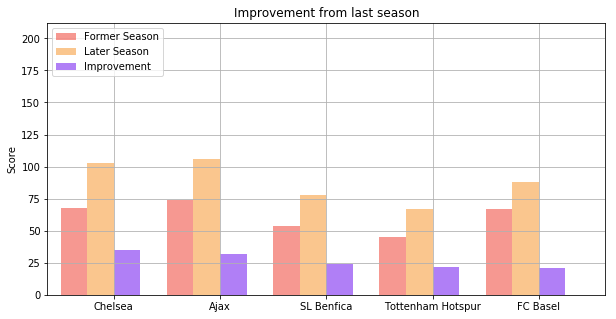

(5, 6)


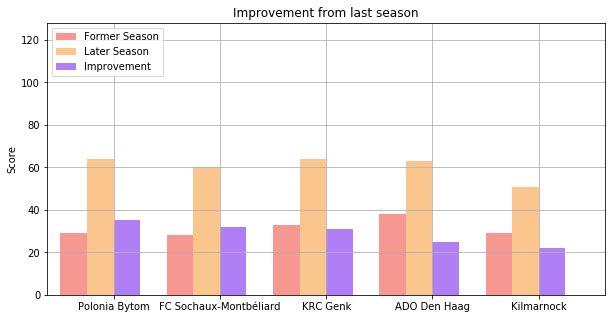

(5, 6)


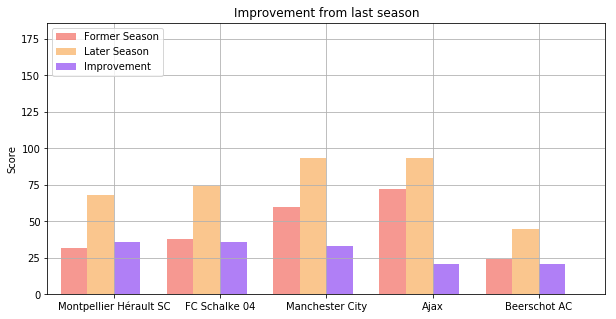

(5, 6)


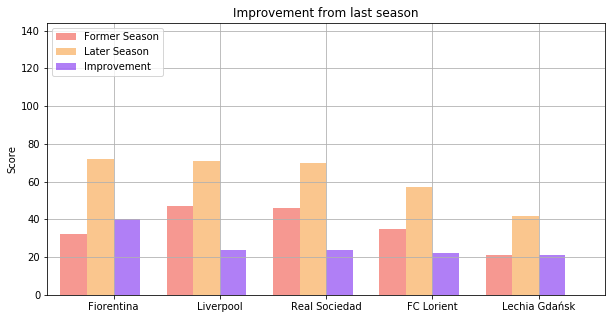

(5, 6)


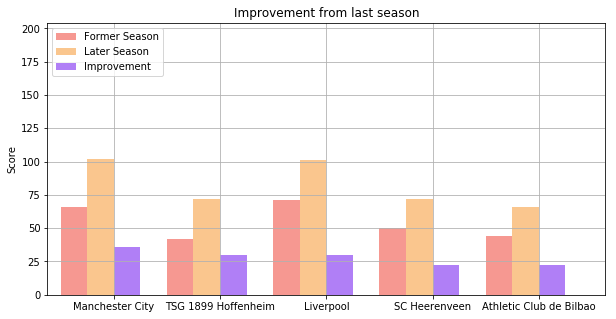

(5, 6)


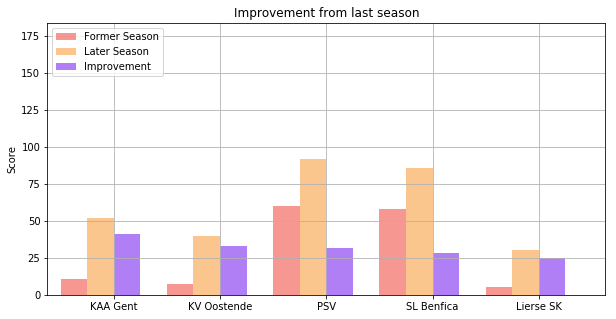

(5, 6)


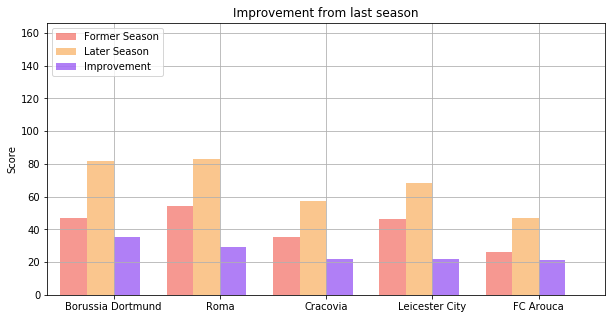

In [55]:
for i in range(len(df_season_improve)):
    df = df_season_improve[i].head(5)
    print(df.shape)
    plot_three_bars(df)

### Question 2: Which players had the most penalties?

In [56]:
df_players=pd.read_csv('./dataset/player_penaltities.csv')
df_players.head(2)

,player_name,penalties
0,Aaron Appindangoye,48.0
1,Aaron Appindangoye,48.0


In [57]:
df_player_total_penalties = df_players.groupby('player_name').sum()

In [58]:
df_player_total_penalties.sort_values(by='penalties',ascending=False).head(10)

,penalties
player_name,
Danilo,6358.0
Fernando,4764.0
Douglas,4687.0
Josue,4671.0
Rafinha,4633.0
Alessio Cerci,4314.0
Carlos Eduardo,4306.0
Maicon,4263.0
Diego,4259.0


In [59]:
df_penalities = df_player_total_penalties.sort_values(by='penalties',ascending=False).head(10)

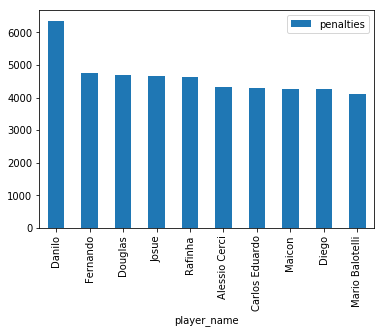

In [60]:
df_penalities.plot(kind='bar')

<a id='conclusions'></a>
## Conclusions

> **Findings in question 1**: From above results we can see, between the two adjacent match season, the teams made the most improvements as below table shows.

<table>
    <tr>
        <th>Former Season</th><th>Later Season</th><th>Team Name</th><th>Former Goals</th><th>Later Goals</th><th>Improvement</th>
    </tr>
    <tr>
        <td>2008/2009</td><td>2009/2010</td><td>Chelsea</td><td>68</td><td>103</td><td>35</td>
    </tr>
    <tr>
        <td>2009/2010</td><td>2010/2011</td><td>Polonia Bytom</td><td>29</td><td>64</td><td>35</td>
    </tr>
    <tr>					
        <td>2010/2011</td><td>2011/2012</td><td>Montpellier Hérault SC</td><td>32</td><td>68</td><td>36</td>
    </tr>
    <tr>					
        <td>2011/2012</td><td>2012/2013</td><td>Fiorentina</td><td>32</td><td>72</td><td>40</td>
    </tr>
    <tr>
        <td>2012/2013</td><td>2013/2014</td><td>Manchester City</td><td>66</td><td>102</td><td>36</td>
    </tr>
    <tr>
        <td>2013/2014</td><td>2014/2015</td><td>KAA Gent</td><td>11</td><td>52</td><td>41</td>
    </tr>
    <tr>
        <td>2014/2015</td><td>2015/2016</td><td>Borussia Dortmund</td><td>47</td><td>82</td><td>35</td>
    </tr>					
</table>


> **Findings in question 2**: Danilo got the most penaltities which is 6358.0.